<a href="https://colab.research.google.com/github/eldercamposds/VisaoComputacional/blob/main/avaliacao_de_verde_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detectar_verde(imagem):
    hsv = cv2.cvtColor(imagem, cv2.COLOR_BGR2HSV)
    # Faixa de verde em HSV
    verde_baixo = np.array([35, 40, 40])
    verde_alto = np.array([85, 255, 255])
    mascara_verde = cv2.inRange(hsv, verde_baixo, verde_alto)
    resultado = cv2.bitwise_and(imagem, imagem, mask=mascara_verde)
    porcentagem_verde = np.sum(mascara_verde > 0) / mascara_verde.size * 100
    return resultado, porcentagem_verde

def comparar_imagens(imagem1_path, imagem2_path):
    img1 = cv2.imread(imagem1_path)
    img2 = cv2.imread(imagem2_path)

    verde1, pct1 = detectar_verde(img1)
    verde2, pct2 = detectar_verde(img2)

    print(f"Imagem 1: {pct1:.2f}% de área verde")
    print(f"Imagem 2: {pct2:.2f}% de área verde")

    # Exibir comparação
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))
    axs[0, 0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    axs[0, 0].set_title("Imagem 1 Original")
    axs[0, 1].imshow(cv2.cvtColor(verde1, cv2.COLOR_BGR2RGB))
    axs[0, 1].set_title(f"Imagem 1 Verde ({pct1:.2f}%)")
    axs[1, 0].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    axs[1, 0].set_title("Imagem 2 Original")
    axs[1, 1].imshow(cv2.cvtColor(verde2, cv2.COLOR_BGR2RGB))
    axs[1, 1].set_title(f"Imagem 2 Verde ({pct2:.2f}%)")
    for ax in axs.flat:
        ax.axis('off')
    plt.tight_layout()
    plt.show()


Imagem 1: 17.86% de área verde
Imagem 2: 7.55% de área verde


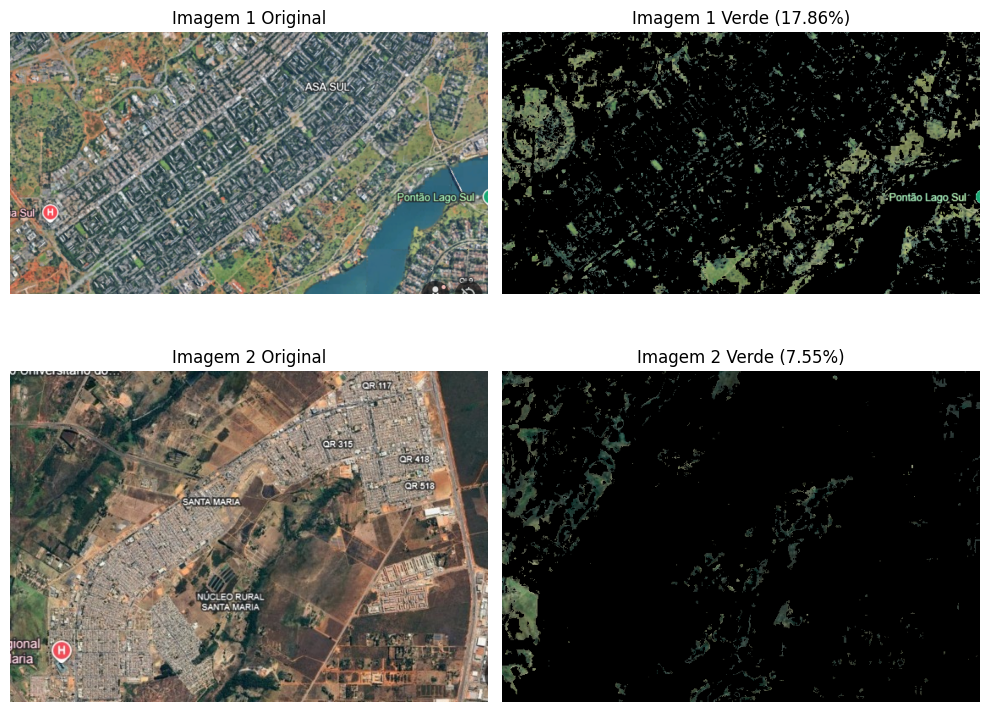

In [4]:
comparar_imagens("/content/drive/MyDrive/Google Earth/asa_sul.png",
                 "/content/drive/MyDrive/Google Earth/santa maria.jpg")
